# Annotation per Image Analysis
---

### Import

In [1]:
import cv2
import os
import seaborn as sns
import json
import multiprocessing as mp
from tqdm import tqdm
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid", {'axes.grid' : False})

### Config

In [2]:
CONFIG = {
    "path_data":"../../../dataset/",
    "info_data_train":"train.json",  # images, annotations
    "info_data_test":"test.json",
}

### Load Json

In [3]:
with open(os.path.join(CONFIG['path_data'], CONFIG['info_data_train'])) as js:
    json_train = json.load(js)

In [7]:
annotations_train[0]

{'image_id': 0,
 'category_id': 0,
 'area': 257301.66,
 'bbox': [197.6, 193.7, 547.8, 469.7],
 'iscrowd': 0,
 'id': 0}

In [35]:
info_train = json_train['images']
annotations_train = json_train['annotations']
# x = number of annotations
# y = number of annotation's catagory
# s = sum of area
df_train = pd.DataFrame(info_train)
df_train = df_train.drop(columns = ['license', 'flickr_url', 'coco_url', 'date_captured'])
df_train['annotations'] = [[] for i in range(len(info_train))]
for an in annotations_train:
    df_train['annotations'].values[an['image_id']].append(an)
df_train['annotations_count'] = [len(ans) for ans in df_train['annotations'].values]
df_train['annotations_category_count'] = [len(set([an['category_id'] for an in ans])) for ans in df_train['annotations'].values]
df_train['annotations_sum_of_area'] = [int(sum([an['area'] for an in ans])) for ans in df_train['annotations'].values]
df_train.head()
print(df_train.describe())

        width  height           id  annotations_count  \
count  4883.0  4883.0  4883.000000        4883.000000   
mean   1024.0  1024.0  2441.000000           4.739709   
std       0.0     0.0  1409.745012           6.355155   
min    1024.0  1024.0     0.000000           1.000000   
25%    1024.0  1024.0  1220.500000           1.000000   
50%    1024.0  1024.0  2441.000000           2.000000   
75%    1024.0  1024.0  3661.500000           6.000000   
max    1024.0  1024.0  4882.000000          71.000000   

       annotations_category_count  annotations_sum_of_area  
count                 4883.000000             4.883000e+03  
mean                     1.934876             4.401477e+05  
std                      1.252878             3.899577e+05  
min                      1.000000             1.054000e+03  
25%                      1.000000             1.652355e+05  
50%                      1.000000             3.280820e+05  
75%                      3.000000             5.867090e+05 

In [36]:
print(type(df_train['annotations_count'].values[0]))
print(type(df_train['annotations_sum_of_area'].values[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


### Annotation per Image Analysis

<AxesSubplot: xlabel='annotations_count', ylabel='annotations_category_count'>

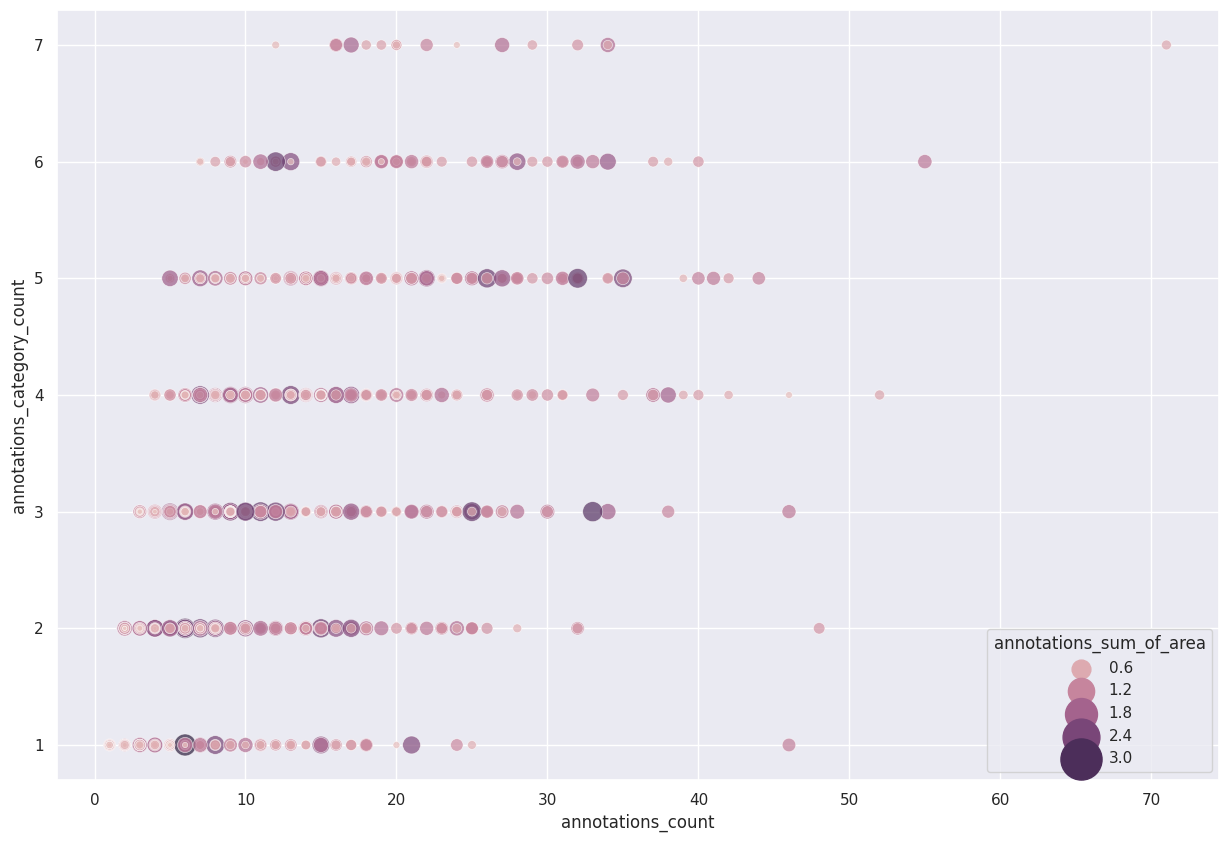

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=df_train, 
                x='annotations_count',
                y='annotations_category_count', 
                size='annotations_sum_of_area',
                hue='annotations_sum_of_area',
                sizes=(10, 1000),
                marker='.', alpha=0.7)

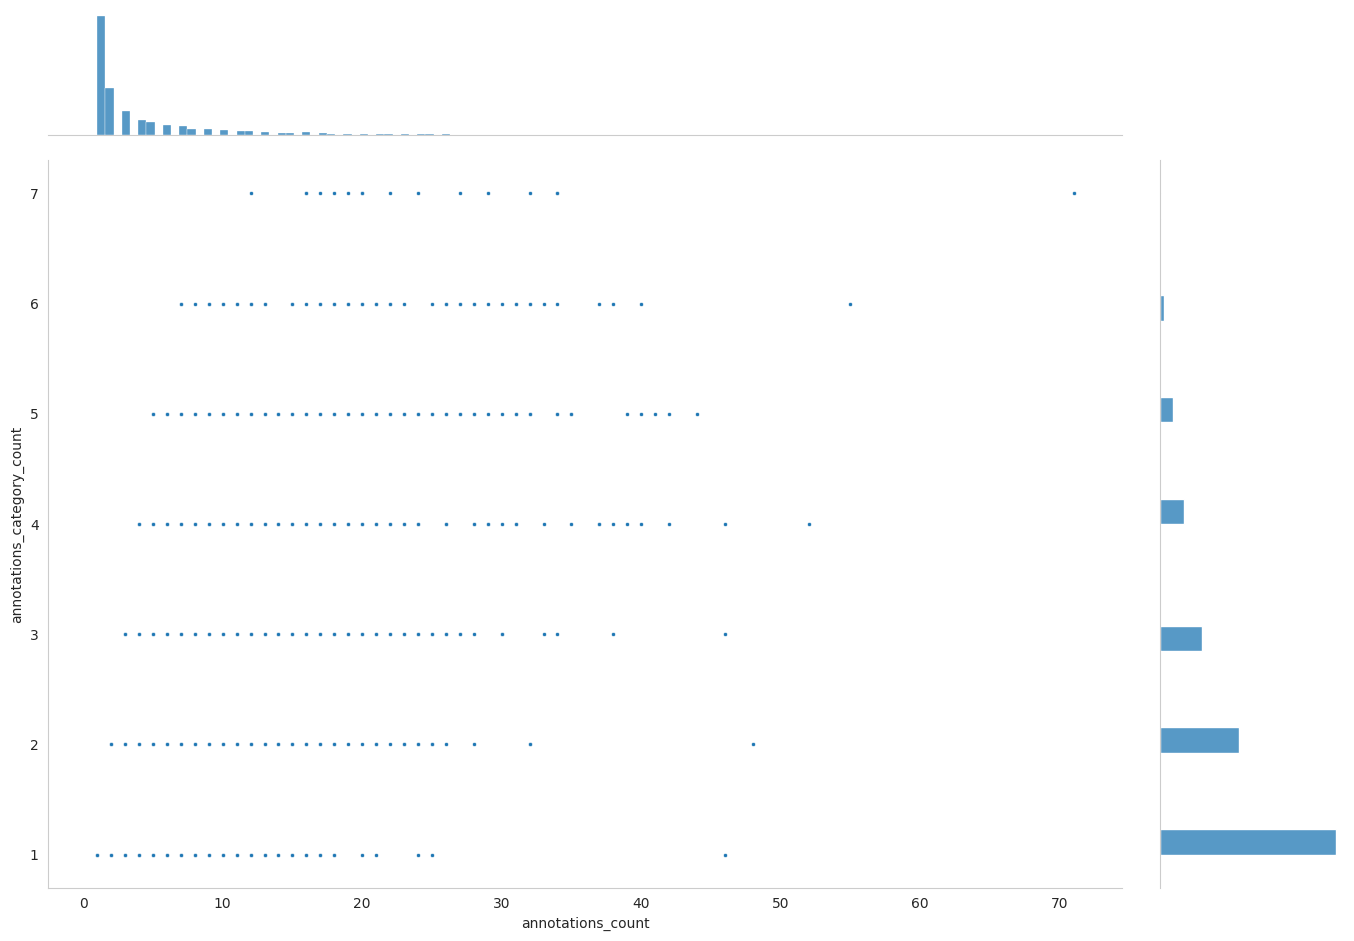

In [38]:
plot = sns.jointplot(data=df_train, kind='scatter', x='annotations_count', y='annotations_category_count', marker='.')
plot.fig.set_figwidth(15)
plot.fig.set_figheight(10)